# Image Segmentation using K-Means [Project]

👨‍💻 **Arjun Adhikari**, July 12, 2019

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=cv2.imread('dora.jpg')

In [3]:
shape=img.shape

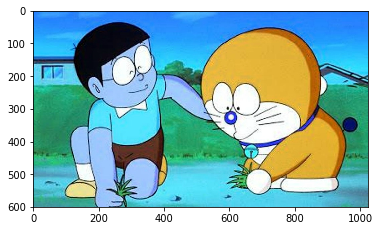

In [4]:
plt.imshow(img)
plt.show()

In [5]:
im=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

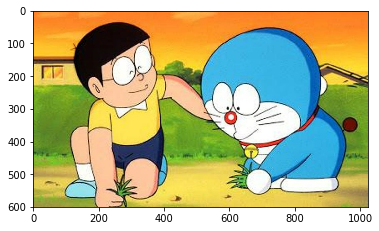

In [6]:
plt.imshow(im)
plt.show()

> Flatten each channel of the image

In [7]:
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(614400, 3)


In [8]:
from sklearn.cluster import KMeans

In [9]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
centers=km.cluster_centers_

In [11]:
centers=np.array(centers,dtype='uint8')

In [12]:
print(centers)

[[243 223 202]
 [ 52 167 217]
 [ 87 110  39]
 [237 176  62]]


### Plot what all colors are these

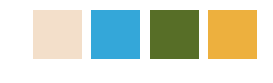

In [13]:
i=1
plt.figure(0,figsize=(4,2))
colors=[]

for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.axis('off')
    plt.imshow(a)

### Segmenting our Original Image

In [14]:
new_img=np.zeros((all_pixels.shape))

In [15]:
print(new_img.shape)

(614400, 3)


In [16]:
print(colors)

[array([243, 223, 202], dtype=uint8), array([ 52, 167, 217], dtype=uint8), array([ 87, 110,  39], dtype=uint8), array([237, 176,  62], dtype=uint8)]


In [17]:
centers

array([[243, 223, 202],
       [ 52, 167, 217],
       [ 87, 110,  39],
       [237, 176,  62]], dtype=uint8)

In [18]:
for i in range(new_img.shape[0]):
    new_img[i]=centers[km.labels_[i]]

For making the values of shape between 0 and 1.

In [19]:
new_img = new_img/255.

All 3 channels are [0,1]

In [20]:
new_img[0][0]

0.9294117647058824

In [21]:
new_img.min(axis=1) 

array([0.24313725, 0.24313725, 0.24313725, ..., 0.24313725, 0.24313725,
       0.24313725])

In [22]:
new_img = new_img.reshape(img.shape[0],img.shape[1],3)

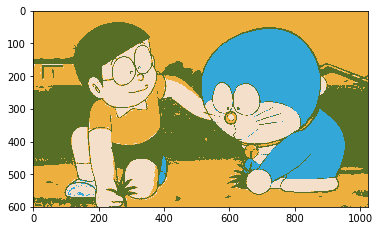

In [23]:
plt.imshow(new_img)
plt.show()

By this approach, I was able to implement Image Segmentation using K-Means.